In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-vs-dirty/sol.csv
/kaggle/input/cleaned-vs-dirty/test/0346_ff8fdba4b31b4d31a02af60a5b00c5a4.jpg
/kaggle/input/cleaned-vs-dirty/test/0708_67a3330215434d028e6d3e1675febf43.jpg
/kaggle/input/cleaned-vs-dirty/test/0073_ad0c238f44cd473d987781bbc6cb02ed.jpg
/kaggle/input/cleaned-vs-dirty/test/0482_bb469cd2d4ac4d3f8995748eaad1310d.jpg
/kaggle/input/cleaned-vs-dirty/test/0284_39b89a8323b641de95daf2a552a30833.jpg
/kaggle/input/cleaned-vs-dirty/test/0493_19d1d729b1b0402b9d22017b164ad348.jpg
/kaggle/input/cleaned-vs-dirty/test/0324_5bad125f956d488ab79aecc248c1e232.jpg
/kaggle/input/cleaned-vs-dirty/test/0090_b5d4a6c464b94d228cdab18ea646cd38.jpg
/kaggle/input/cleaned-vs-dirty/test/0387_e7e62a6599834375b6b2e936c535ccc5.jpg
/kaggle/input/cleaned-vs-dirty/test/0398_cecaee3eb5da40dab065d6649cef1aec.jpg
/kaggle/input/cleaned-vs-dirty/test/0012_095ebe8f1c414737849687309a140508.jpg
/kaggle/input/cleaned-vs-dirty/test/0021_b3695cce7c1c4ae58e623e026e56f350.jpg
/kaggle/input/cleaned-vs-

In [3]:
import numpy as np
np.random.seed(1000)

import pandas as pd
import cv2
import keras
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['KERAS_BACKEND'] = 'tensorflow'
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import tensorflow_hub as hub
import itertools
from six.moves import urllib
from os.path import join, exists
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.applications import VGG16, DenseNet121
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from skimage import transform
from tqdm.notebook import tqdm_notebook
from enum import Enum

num_classes =2

/tmp/ipykernel_37/4118434050.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [7]:
DIR = '/kaggle/input/cleaned-vs-dirty/train' #Create directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes
classes

['cleaned', 'dirty']

In [8]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.jpg':               # If filename contains .png
            label.append(os.path.split(dirname)[-1])        
            path.append(os.path.join(dirname,filename))    

# Create df
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [9]:
df

,path,label
0,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
1,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
2,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
3,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
4,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
5,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
6,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
7,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
8,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned
9,/kaggle/input/cleaned-vs-dirty/train/cleaned/0...,cleaned


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(df['label'])
df['label_encoded'] =label_encoder.transform(df['label'])

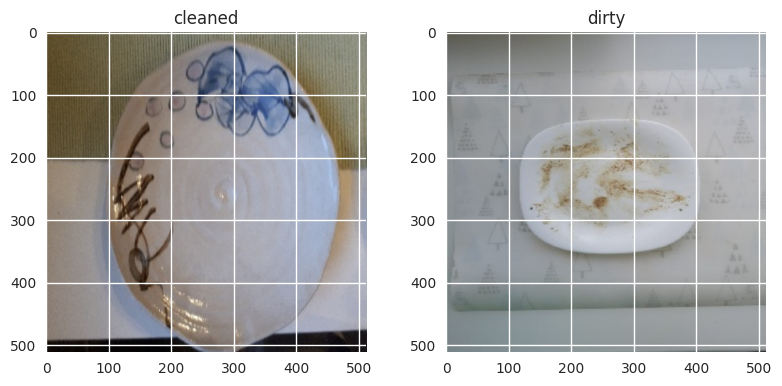

In [11]:
plt.figure(figsize=(15,12))
num_rows, num_cols = 3, 3
for i, unique_label in enumerate(df['label'].unique()):
    ax = plt.axes([0.1 + (i % num_cols) * 0.8 / num_cols, 0.9 - (i // num_cols) * 0.8 / num_rows, 0.8 / num_cols, 0.8 / num_rows])
    ax.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    ax.set_title(unique_label)
plt.show()

In [12]:
x = []
for img_path in df['path']:
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224)) # Görüntüyü 32x32 boyutuna küçült
            img = img.astype(np.uint8) # Float64 yerine uint8 kullan
            img = img / 255.0 # Normalize et
            x.append(img)
    else:
        print(f"Görüntü dosyası bulunamadı: {img_path}")

x = np.array(x)
print(x.shape)

(40, 224, 224, 3)


In [13]:
y=df['label_encoded']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Giriş boyutu
input_size = (224, 224, 3)

# Modeli oluşturma
model = Sequential()

# İlk katmanlar
model.add(Input(shape=input_size))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ekstra katmanlar
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Düzleştirme ve tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Aşırı öğrenmeyi önlemek için dropout ekleniyor
model.add(Dense(36, activation='softmax'))  # Çıkış katmanı

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli özetleme
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,004,580 (30.54 MB)

 Trainable params: 8,002,596 (30.53 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 193600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    24,780,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,804,964 (94.62 MB)

 Trainable params: 24,804,964 (94.62 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history=model.fit(x_train, y_train, batch_size=64, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8125 - loss: 2.9456 - val_accuracy: 0.0000e+00 - val_loss: 9.5174
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8438 - loss: 1.8263 - val_accuracy: 0.0000e+00 - val_loss: 8.6266
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7188 - loss: 3.3830 - val_accuracy: 0.0000e+00 - val_loss: 7.6709
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8438 - loss: 0.9384 - val_accuracy: 0.2500 - val_loss: 5.4985
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8438 - loss: 1.5475 - val_accuracy: 0.3750 - val_loss: 3.3021
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8750 - loss: 2.4335 - val_accuracy: 0.5000 - val_loss: 1.5282
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8750 - loss: 1.1058 - val_accuracy: 0.5000 - val_loss: 0.8827
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9062 - loss: 0.9746 - val_accuracy: 0.3750 - val_loss: 1.0

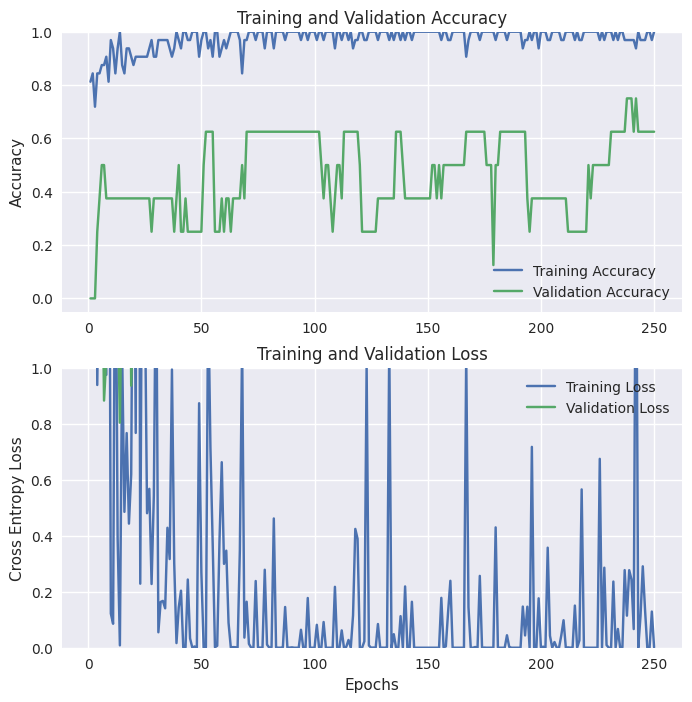

In [22]:
import matplotlib.pyplot as plt

# Retrieve the training and validation metrics from the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs
epochs_range = range(1, len(acc) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1.0])
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')

plt.show()